In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train["SalePrice"].describe()           

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

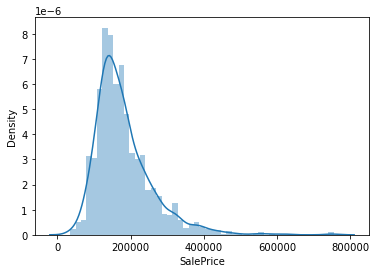

In [5]:
#to show the data distribution
sns.distplot(df_train["SalePrice"])

In [6]:
print("Skewness = ",df_train["SalePrice"].skew())
print("Kurtosis = ",df_train["SalePrice"].kurt())

Skewness =  1.8828757597682129
Kurtosis =  6.536281860064529


Text(0, 0.5, 'SalePrice')

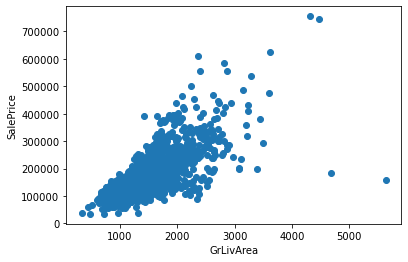

In [7]:
#scatter plot,    linearly related with saleprice 
data = pd.concat([df_train["GrLivArea"],df_train["SalePrice"]],axis=1)
data.head(5)
plt.scatter(df_train["GrLivArea"],df_train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

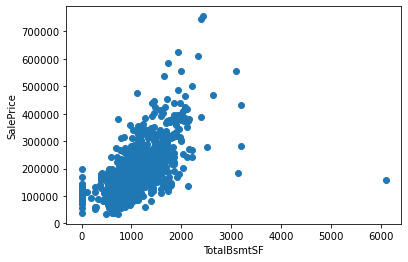

In [8]:
#linearly related with saleprice
data = pd.concat([df_train["TotalBsmtSF"],df_train["SalePrice"]],axis=1)
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

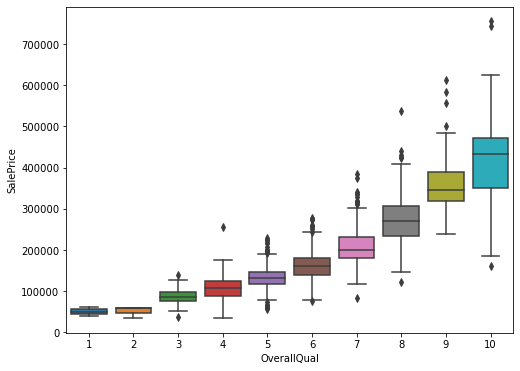

In [9]:
#the plot show the relation between saleprice and the quality 
data = pd.concat([df_train["OverallQual"],df_train["SalePrice"]],axis=1)
fig,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"], data=df_train)

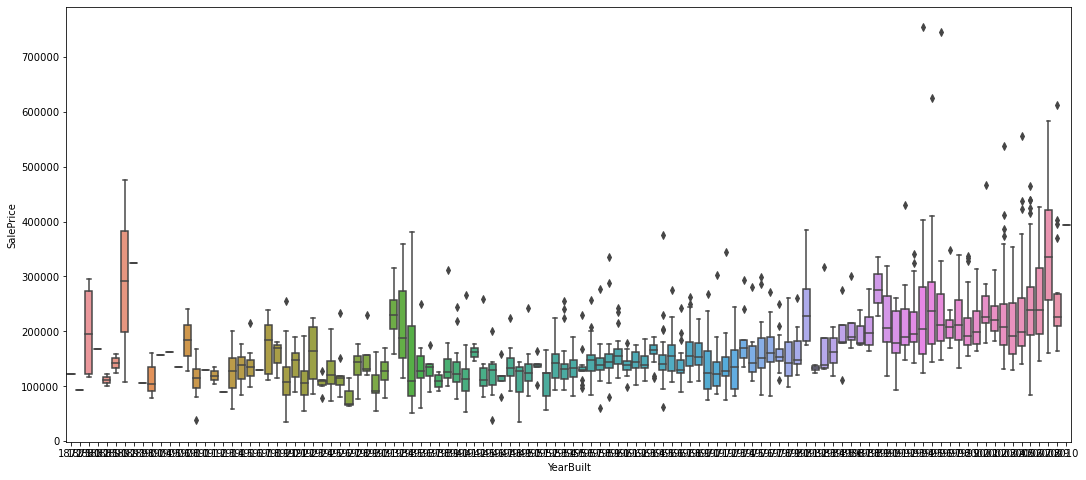

In [10]:
#the plot show the relation between saleprice and the yearbuilt 
data = pd.concat([df_train["YearBuilt"],df_train["SalePrice"]],axis=1)
fig,ax = plt.subplots(figsize=(18,8))
fig = sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"], data=df_train)

<AxesSubplot:>

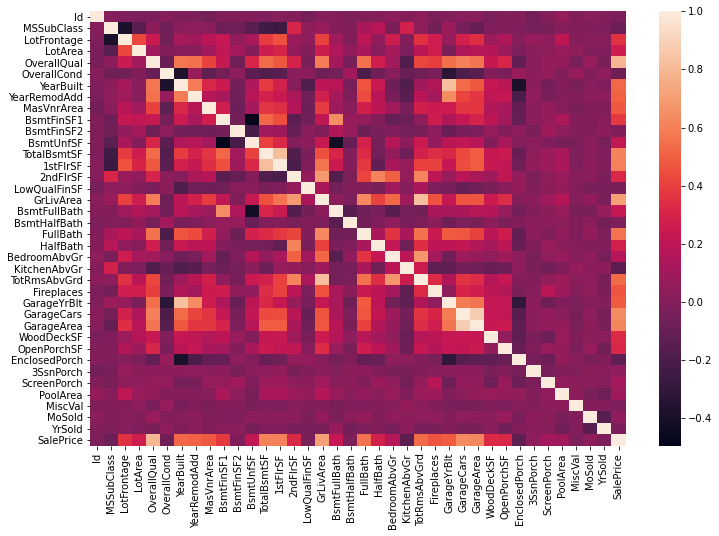

In [11]:
#the correlation between the features and output(saleprice)
corrmat = df_train.corr()
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat)

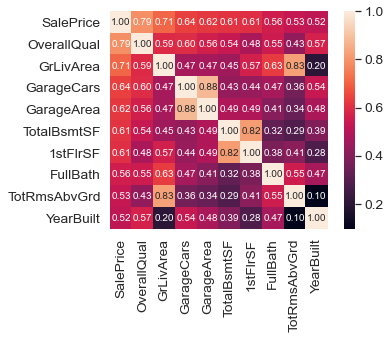

In [12]:
#the feature that most related 
#Zoomed heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

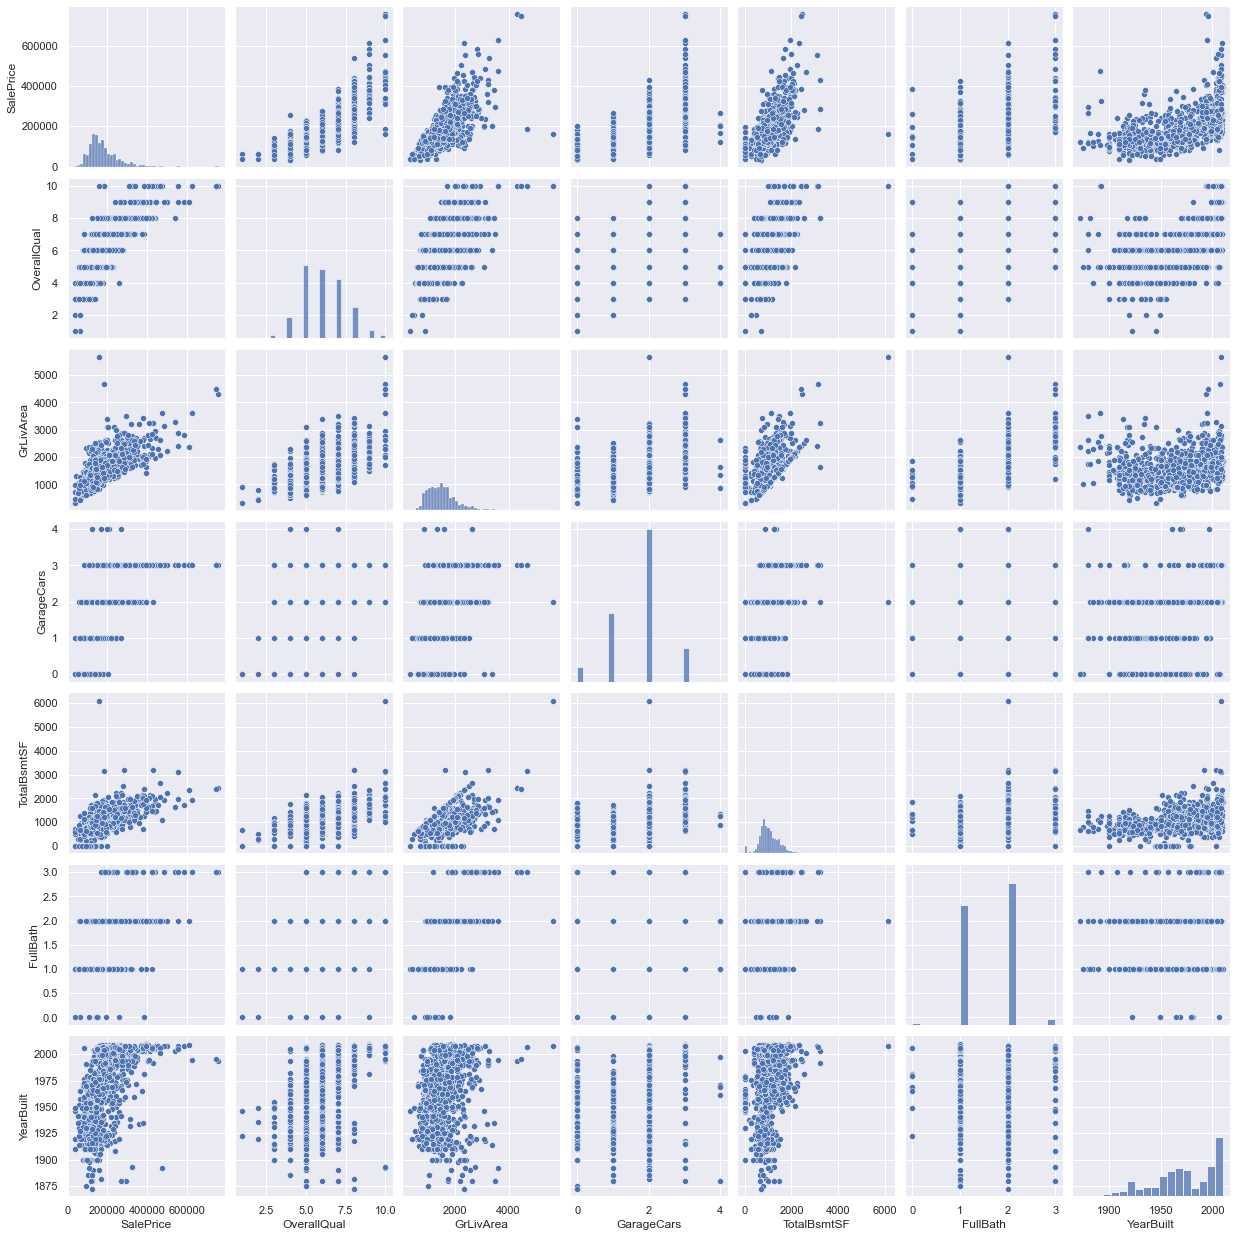

In [13]:
sns.set()
cols = ["SalePrice", 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5)

In [14]:
#all missing Value in data 
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [16]:
#deleting the missing value 
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train["Electrical"].isnull()].index)
df_train.isnull().sum().max()

0

In [17]:
#standarization of data
#univarite analysis   (outliers)
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
low_range,high_range

(array([[-1.83820775],
        [-1.83303414],
        [-1.80044422],
        [-1.78282123],
        [-1.77400974],
        [-1.62295562],
        [-1.6166617 ],
        [-1.58519209],
        [-1.58519209],
        [-1.57269236]]),
 array([[3.82758058],
        [4.0395221 ],
        [4.49473628],
        [4.70872962],
        [4.728631  ],
        [5.06034585],
        [5.42191907],
        [5.58987866],
        [7.10041987],
        [7.22629831]]))

Text(0, 0.5, 'SalePrice')

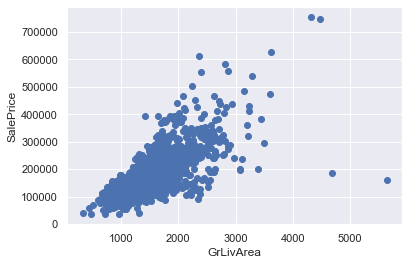

In [18]:
#bivariate analysis
data = pd.concat([df_train["GrLivArea"],df_train["SalePrice"]],axis=1)
plt.scatter(df_train["GrLivArea"],df_train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

In [19]:
#deleting the two points 
df_train.sort_values(by="GrLivArea",ascending=False)[:2]
df_train = df_train.drop(df_train[df_train["Id"]==1299].index)
df_train = df_train.drop(df_train[df_train["Id"]==524].index)

Text(0, 0.5, 'SalePrice')

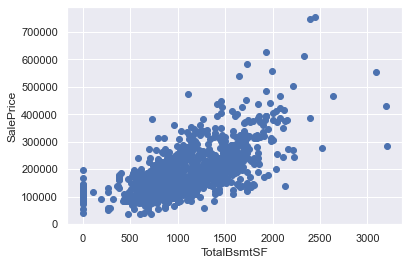

In [20]:
#bivariate analysis (TotalBsmtSF,SalePrice)
data = pd.concat([df_train["TotalBsmtSF"],df_train["SalePrice"]],axis=1)
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

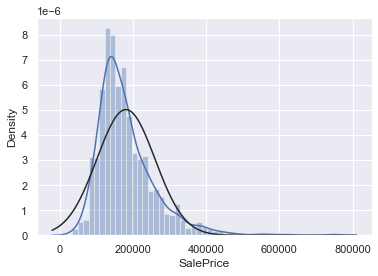

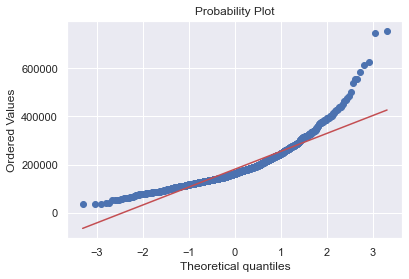

In [21]:
#Histogram(skewness,kurtosis) and normal probability  
sns.distplot(df_train["SalePrice"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot=plt)

In [22]:
#log transformation
df_train["SalePrice"] = np.log(df_train["SalePrice"])

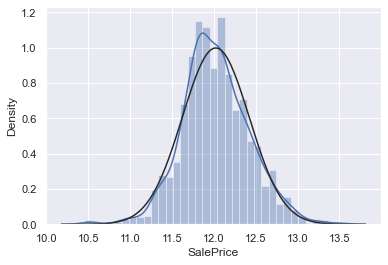

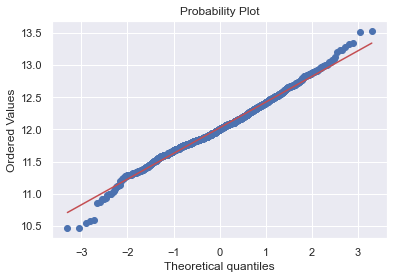

In [23]:
#transformed Histogram and normal probability  
sns.distplot(df_train["SalePrice"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot=plt)

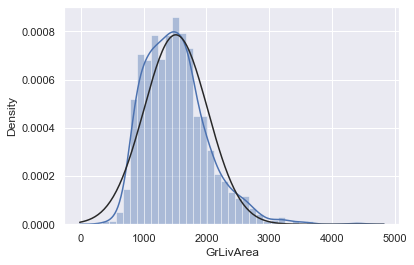

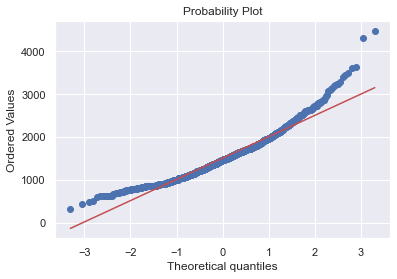

In [24]:
#Histogram and normal probability for(GrLivArea)
sns.distplot(df_train["GrLivArea"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["GrLivArea"],plot=plt)

In [25]:
#log transformation
df_train["GrLivArea"] = np.log(df_train["GrLivArea"])

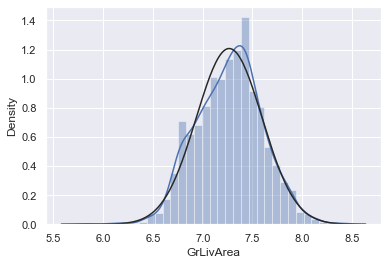

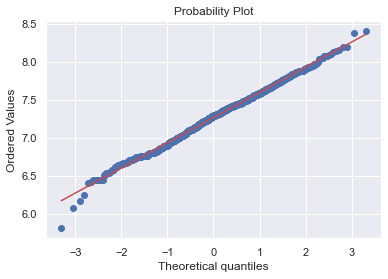

In [26]:
#transformed Histogram and normal probability for(GrLivArea)
sns.distplot(df_train["GrLivArea"], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train["GrLivArea"],plot=plt)

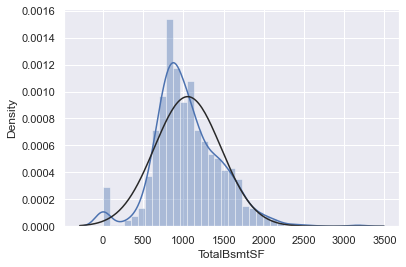

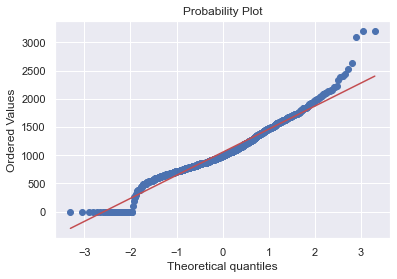

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [28]:
df_train["HasBsmt"] = pd.Series(len(df_train["TotalBsmtSF"]),index = df_train.index)
df_train["HasBsmt"] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [29]:
#transformation of data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

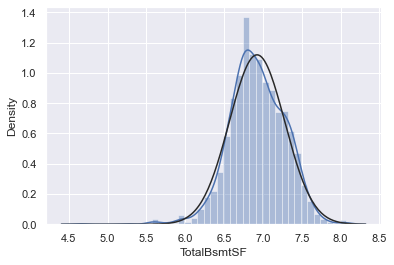

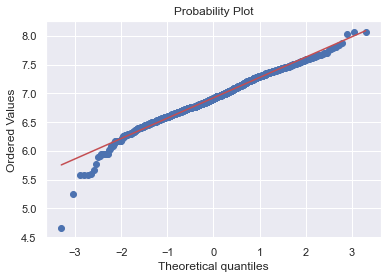

In [30]:
#transformed histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

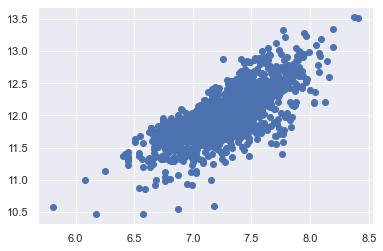

In [31]:
plt.scatter(df_train["GrLivArea"],df_train["SalePrice"])

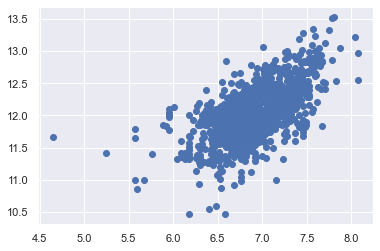

In [32]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

In [33]:
df_train = pd.get_dummies(df_train)

In [34]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
X = df_train.iloc[:,:-1]
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,0,1
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,0,1
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,0,1
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,1,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,1,0,0,0,0,1
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,1,0,0,0,0,1
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,0,1,0,0,0,0,1
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,0,1,0,0,0,0,1
